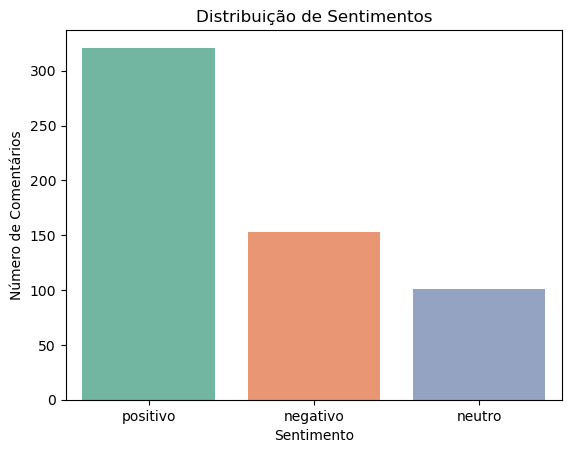

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# carregar CSV processado
df = pd.read_csv("../saidas/Output_reddit_CSV.csv")

# contagem de sentimentos
sent_counts = df["sentimento"].value_counts()

# gráfico de barras
sns.barplot(x=sent_counts.index, y=sent_counts.values, palette="Set2")
plt.title("Distribuição de Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Número de Comentários")
plt.show()


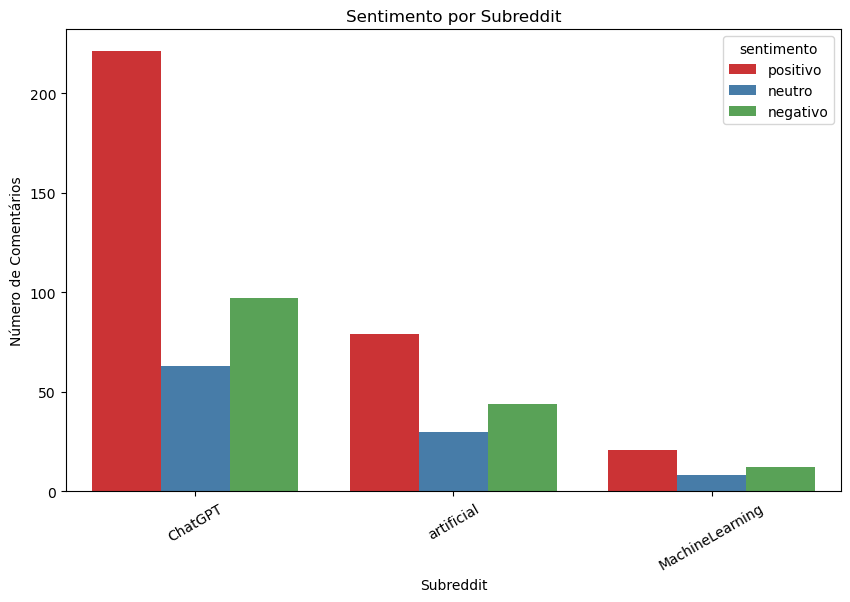

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="subreddit", hue="sentimento", palette="Set1")
plt.title("Sentimento por Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Número de Comentários")
plt.xticks(rotation=30)
plt.show()


In [9]:
import pandas as pd
import spacy

# carregar modelo do spaCy
nlp = spacy.load("en_core_web_sm")  # para inglês
# se quiser português: nlp = spacy.load("pt_core_news_sm")

# carregar o CSV
df = pd.read_csv("../saidas/Output_reddit_CSV.csv")

# pegar apenas as 10 primeiras linhas
amostra = df.head(10)["comment"]

# analisar cada comentário
for i, comentario in enumerate(amostra, 1):
    doc = nlp(str(comentario))
    print(f"\n--- Linha {i} ---")
    for token in doc:
        print(f"{token.text:<15} → {token.pos_}")
linhas = []

for i, comentario in enumerate(amostra, 1):
    doc = nlp(str(comentario))
    for token in doc:
        linhas.append({
            "linha": i,
            "palavra": token.text,
            "classe_gramatical": token.pos_
        })

df_pos = pd.DataFrame(linhas)
print(df_pos.head(20))  # mostra as primeiras 20 linhas




--- Linha 1 ---
Hey             → INTJ
/u              → PUNCT
/               → SYM
Sara_Marconi    → X
!               → PROPN


            → SPACE
If              → SCONJ
your            → PRON
post            → NOUN
is              → AUX
a               → DET
screenshot      → NOUN
of              → ADP
a               → DET
ChatGPT         → ADJ
conversation    → NOUN
,               → PUNCT
please          → INTJ
reply           → VERB
to              → ADP
this            → DET
message         → NOUN
with            → ADP
the             → DET
[               → X
conversation    → NOUN
link](https://help.openai.com → PROPN
/               → SYM
en              → PROPN
/               → SYM
articles/7925741 → VERB
-               → PUNCT
chatgpt         → NOUN
-               → PUNCT
shared          → VERB
-               → PUNCT
links           → NOUN
...             → PUNCT

--- Linha 2 ---
even            → ADV
the             → DET
title           → NOUN
was             → A

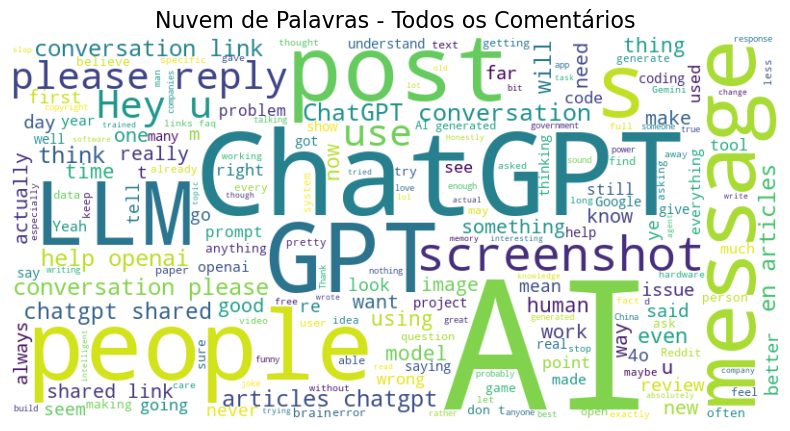

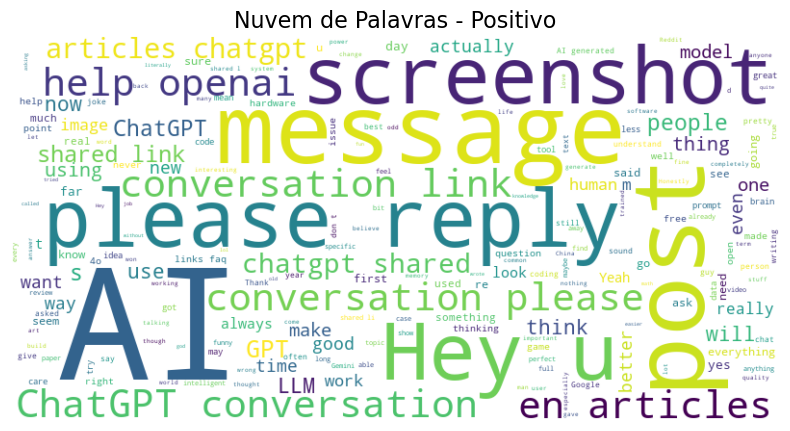

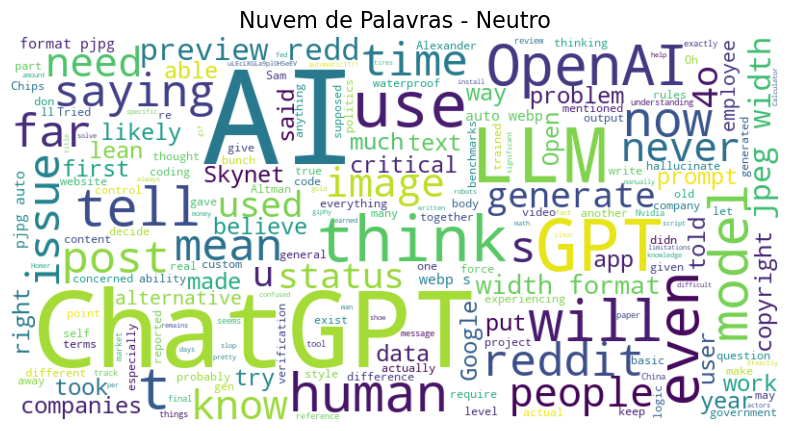

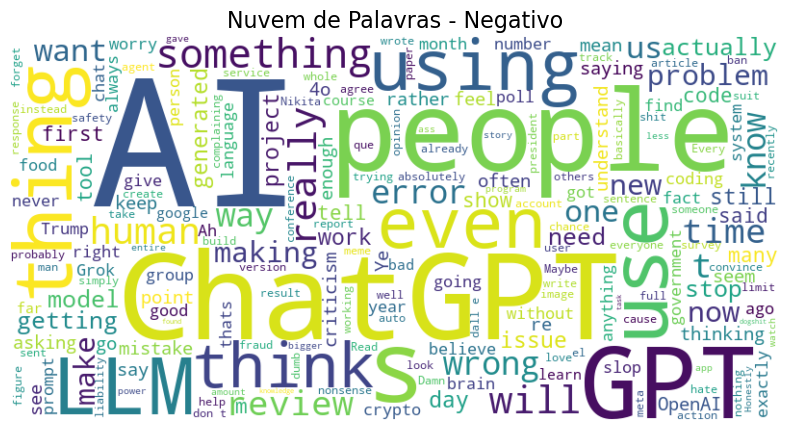

In [6]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# carregar CSV
df = pd.read_csv("../saidas/Output_reddit_CSV.csv")

# palavras de stop em inglês + português
stopwords = set(STOPWORDS)
stopwords.update(["https", "http", "com", "www"])  # remove links inúteis

# função para gerar nuvem
def gerar_wordcloud(texto, titulo):
    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        stopwords=stopwords,
        colormap="viridis"  # você pode trocar: "plasma", "coolwarm", "inferno" etc.
    ).generate(" ".join(texto))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(titulo, fontsize=16)
    plt.show()

# nuvem geral (todos os comentários)
gerar_wordcloud(df["comment"].astype(str), "Nuvem de Palavras - Todos os Comentários")

# nuvem para cada sentimento
for sentimento in df["sentimento"].unique():
    subset = df[df["sentimento"] == sentimento]["comment"].astype(str)
    gerar_wordcloud(subset, f"Nuvem de Palavras - {sentimento.capitalize()}")
